In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial import Delaunay


def malha_ordenada(n):
    # Criar uma matriz nxn com n^2 pontos
    points = [(i, j) for i in range(n) for j in range(n)]
    triangles = formar_triangulos(points, n)
    adj_matrix = Matriz_adjacencia(points,n, triangles)
    plot_mesh(points, triangles, n, 'Malha Ordenada')


def formar_triangulos(points, n):
    # Formar triângulos
    triangles = []
    for i in range(n - 1):
        for j in range(n - 1):
            index_p = i * n + j
            # Triângulo inferior direito
            triangles.append([points[index_p], points[index_p+n], points[index_p+n+1]])
            # Triângulo superior esquerdo
            triangles.append([points[index_p], points[index_p+1], points[index_p+n+1]])
    return triangles

def Matriz_adjacencia(points, n, triangles):

    # Construir a matriz de adjacência
    adj_matrix = np.zeros((n**2, n**2), dtype=int)
    point_index = {point: idx for idx, point in enumerate(points)}

    for triangle in triangles:
        for i in range(3):
            for j in range(i + 1, 3):
                p1 = point_index[triangle[i]]
                p2 = point_index[triangle[j]]
                adj_matrix[p1, p2] = 1
                adj_matrix[p2, p1] = 1

    # Preencher a diagonal principal com 1s
    np.fill_diagonal(adj_matrix, 1)

    # Plotar o gráfico com a malha quadriculada
    fig, ax = plt.subplots(figsize = (2*n,2*n))
    cax = ax.matshow(adj_matrix, cmap='gray_r')

    # Configurar ticks
    ticks = np.arange(n**2)
    ax.set_xticks(np.arange(-0.5, n**2, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, n**2, 1), minor=True)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    tick_labels = np.arange(1, n**2 + 1)
    ax.set_xticklabels(tick_labels)
    ax.set_yticklabels(tick_labels)


    # Configurar grade com espessura reduzida
    ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)
    ax.tick_params(which='minor', size=0)

    # Esconder ticks principais
    ax.tick_params(which='major', bottom=False, left=False)

    plt.title('Matriz de Adjacência com Malha Quadriculada')
    plt.show()
    return triangles, adj_matrix

def plot_mesh(points, triangles, n, title):
    num_vertices = len(points)
    num_triangles = len(triangles)
    plt.figure()

    for idx, triangle in enumerate(triangles):
        t_points = np.array(triangle)
        plt.fill(t_points[:, 0], t_points[:, 1], edgecolor='k', fill=False)
        centroid = np.mean(t_points, axis=0)
        plt.text(centroid[0], centroid[1], str(idx+1), color='blue', fontsize=12, ha='center')

    for idx, point in enumerate(points):
        plt.scatter(point[1], point[0], color='r')
        plt.text(point[1], point[0], str(idx+1), color='green', fontsize=12, ha='right', va='bottom')

    plt.title(f"{title}\nVertices: {num_vertices}, Triangles: {num_triangles}")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()

In [14]:
def malha_ver_aleatoria(n):
    # Criar uma matriz nxn com n^2 pontos
    points = [(i, j) for i in range(n) for j in range(n)]
    triangles = formar_triangulos(points, n)
    
    shuffled_points = points[:]
    random.shuffle(shuffled_points)

    adj_matrix = Matriz_adjacencia(shuffled_points, n, triangles)
    plot_mesh(shuffled_points, triangles, n, 'Malha com Vértices Aleatórios')


In [15]:
def malha_triang_aleatoria(n):
    # Criar uma matriz nxn com n^2 pontos
    points = [(i, j) for i in range(n) for j in range(n)]
    triangles = formar_triangulos(points, n)


    random.shuffle(triangles)

    adj_matrix = Matriz_adjacencia(points, n, triangles)
    plot_mesh(points, triangles, n, 'Malha com Triângulos Aleatórios')

In [4]:
def malha_aleatoria(n):
    # Criar uma matriz nxn com n^2 pontos
    points = [(i, j) for i in range(n) for j in range(n)]
    triangles = formar_triangulos(points, n)

    shuffled_points = points[:]
    random.shuffle(shuffled_points)
    random.shuffle(triangles)

    adj_matrix = Matriz_adjacencia(shuffled_points, n, triangles)
    plot_mesh(shuffled_points, triangles, n, 'Malha com Vértices e Triângulos Aleatorios')

In [5]:
def delaunay_triangulation(n):
    points = [(random.random(), random.random()) for _ in range(n)]
    points_array = np.array(points)
    delaunay = Delaunay(points_array)
    triangles = points_array[delaunay.simplices]
    plot_mesh(points, triangles, len(points), 'Delaunay Triangulation')

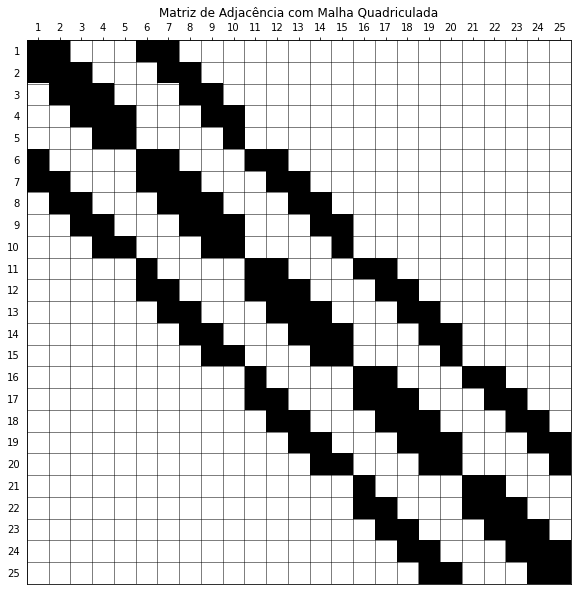

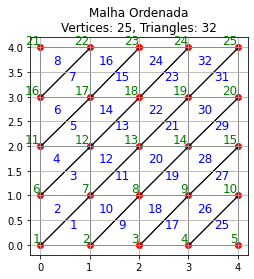

In [16]:
malha_ordenada(5)

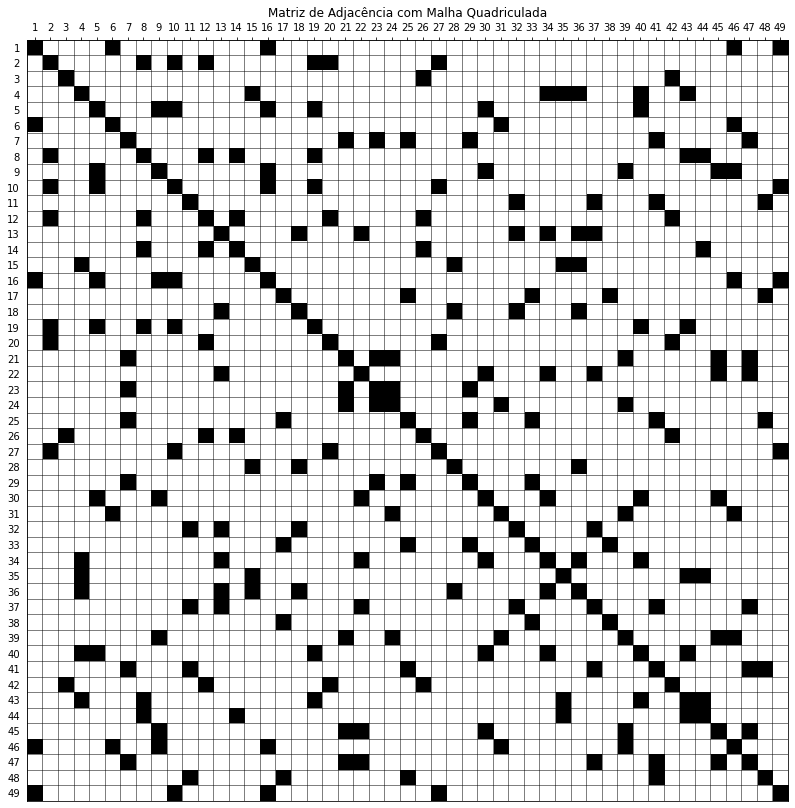

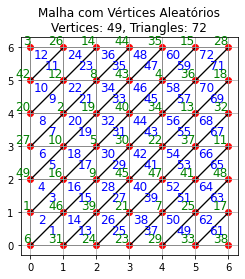

In [18]:
malha_ver_aleatoria(7)

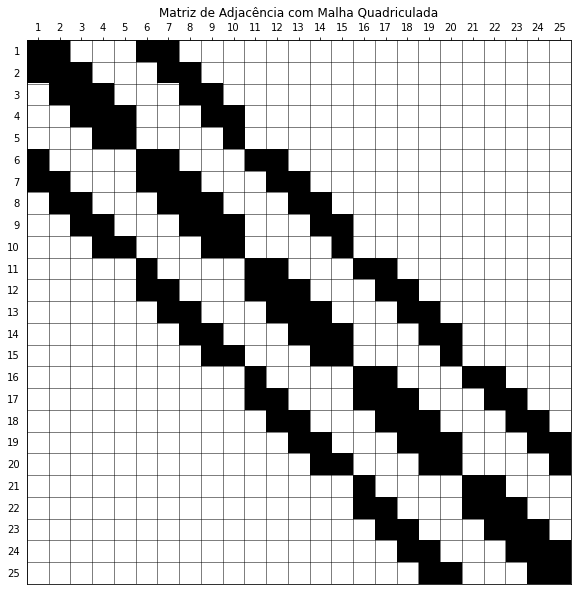

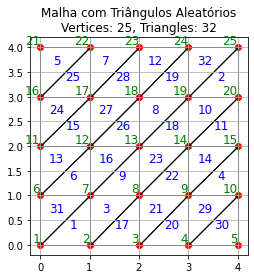

In [19]:
malha_triang_aleatoria(5)

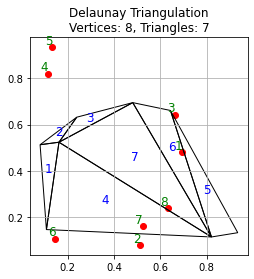

In [20]:
delaunay_triangulation(8)

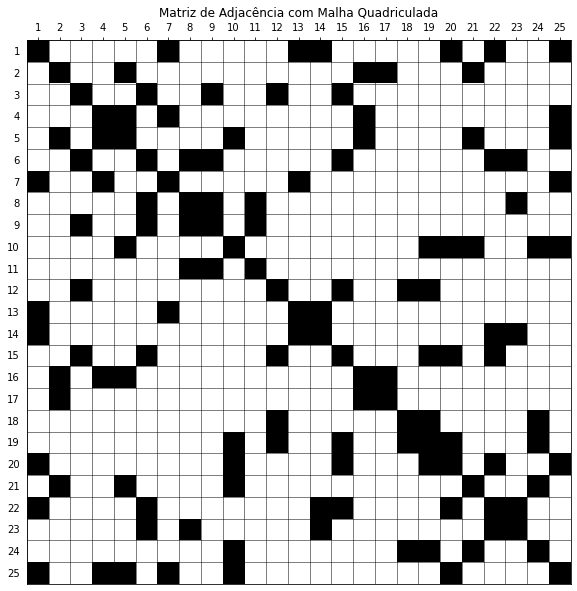

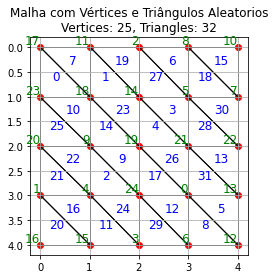

In [10]:
malha_aleatoria(5)